In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df  = pd.read_csv("train.csv", index_col="Id")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   str    
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   str    
 5   Alley          91 non-null     str    
 6   LotShape       1460 non-null   str    
 7   LandContour    1460 non-null   str    
 8   Utilities      1460 non-null   str    
 9   LotConfig      1460 non-null   str    
 10  LandSlope      1460 non-null   str    
 11  Neighborhood   1460 non-null   str    
 12  Condition1     1460 non-null   str    
 13  Condition2     1460 non-null   str    
 14  BldgType       1460 non-null   str    
 15  HouseStyle     1460 non-null   str    
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt      1460

In [4]:
df.shape

(1460, 80)

In [7]:
# handle missing data
df.isna().sum().sort_values(ascending=False).head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
dtype: int64

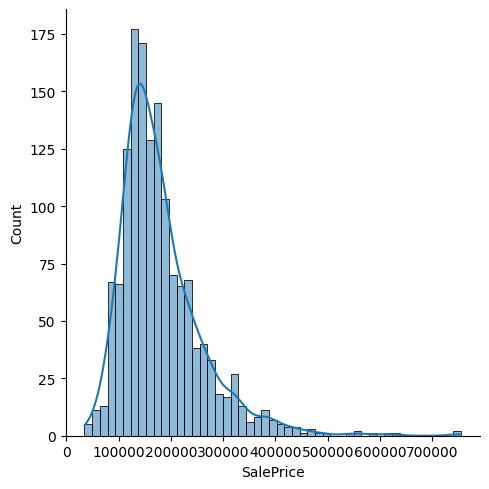

In [8]:
# Let's check the distribution of the target variable
sns.displot(df["SalePrice"], kde=True)
plt.show()

In [9]:
# lets check the missing data in the target variable
df["SalePrice"].isna().sum()

np.int64(0)

In [13]:
percent_missing = df.isna().sum() / len(df) * 100
missing_value_df = pd.DataFrame({"column_name": df.columns, "percent_missing": percent_missing})
missing_value_df.sort_values("percent_missing", ascending=False).head(20)

,column_name,percent_missing
PoolQC,PoolQC,99.520548
MiscFeature,MiscFeature,96.301370
Alley,Alley,93.767123
Fence,Fence,80.753425
MasVnrType,MasVnrType,59.726027
FireplaceQu,FireplaceQu,47.260274
LotFrontage,LotFrontage,17.739726
GarageQual,GarageQual,5.547945
GarageType,GarageType,5.547945
GarageFinish,GarageFinish,5.547945


In [14]:
df.drop(missing_value_df[missing_value_df["percent_missing"] > 60]["column_name"], axis=1, inplace=True)

In [19]:
column = missing_value_df[(missing_value_df["percent_missing"] > 30) & (missing_value_df["percent_missing"] < 61)]["column_name"].tolist()
print(column)

['MasVnrType', 'FireplaceQu']


In [24]:
for col in column:
    df[col] = df[col].fillna("None")

In [31]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])

In [34]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [37]:
df['GarageType'].dtype

<StringDtype(storage='python', na_value=nan)>

In [38]:
cat_cols = df.select_dtypes(include=["object", "string"]).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [39]:
df.isna().sum().sort_values(ascending=False).head(10)

MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
LandSlope      0
dtype: int64

In [40]:
df.shape

(1460, 76)

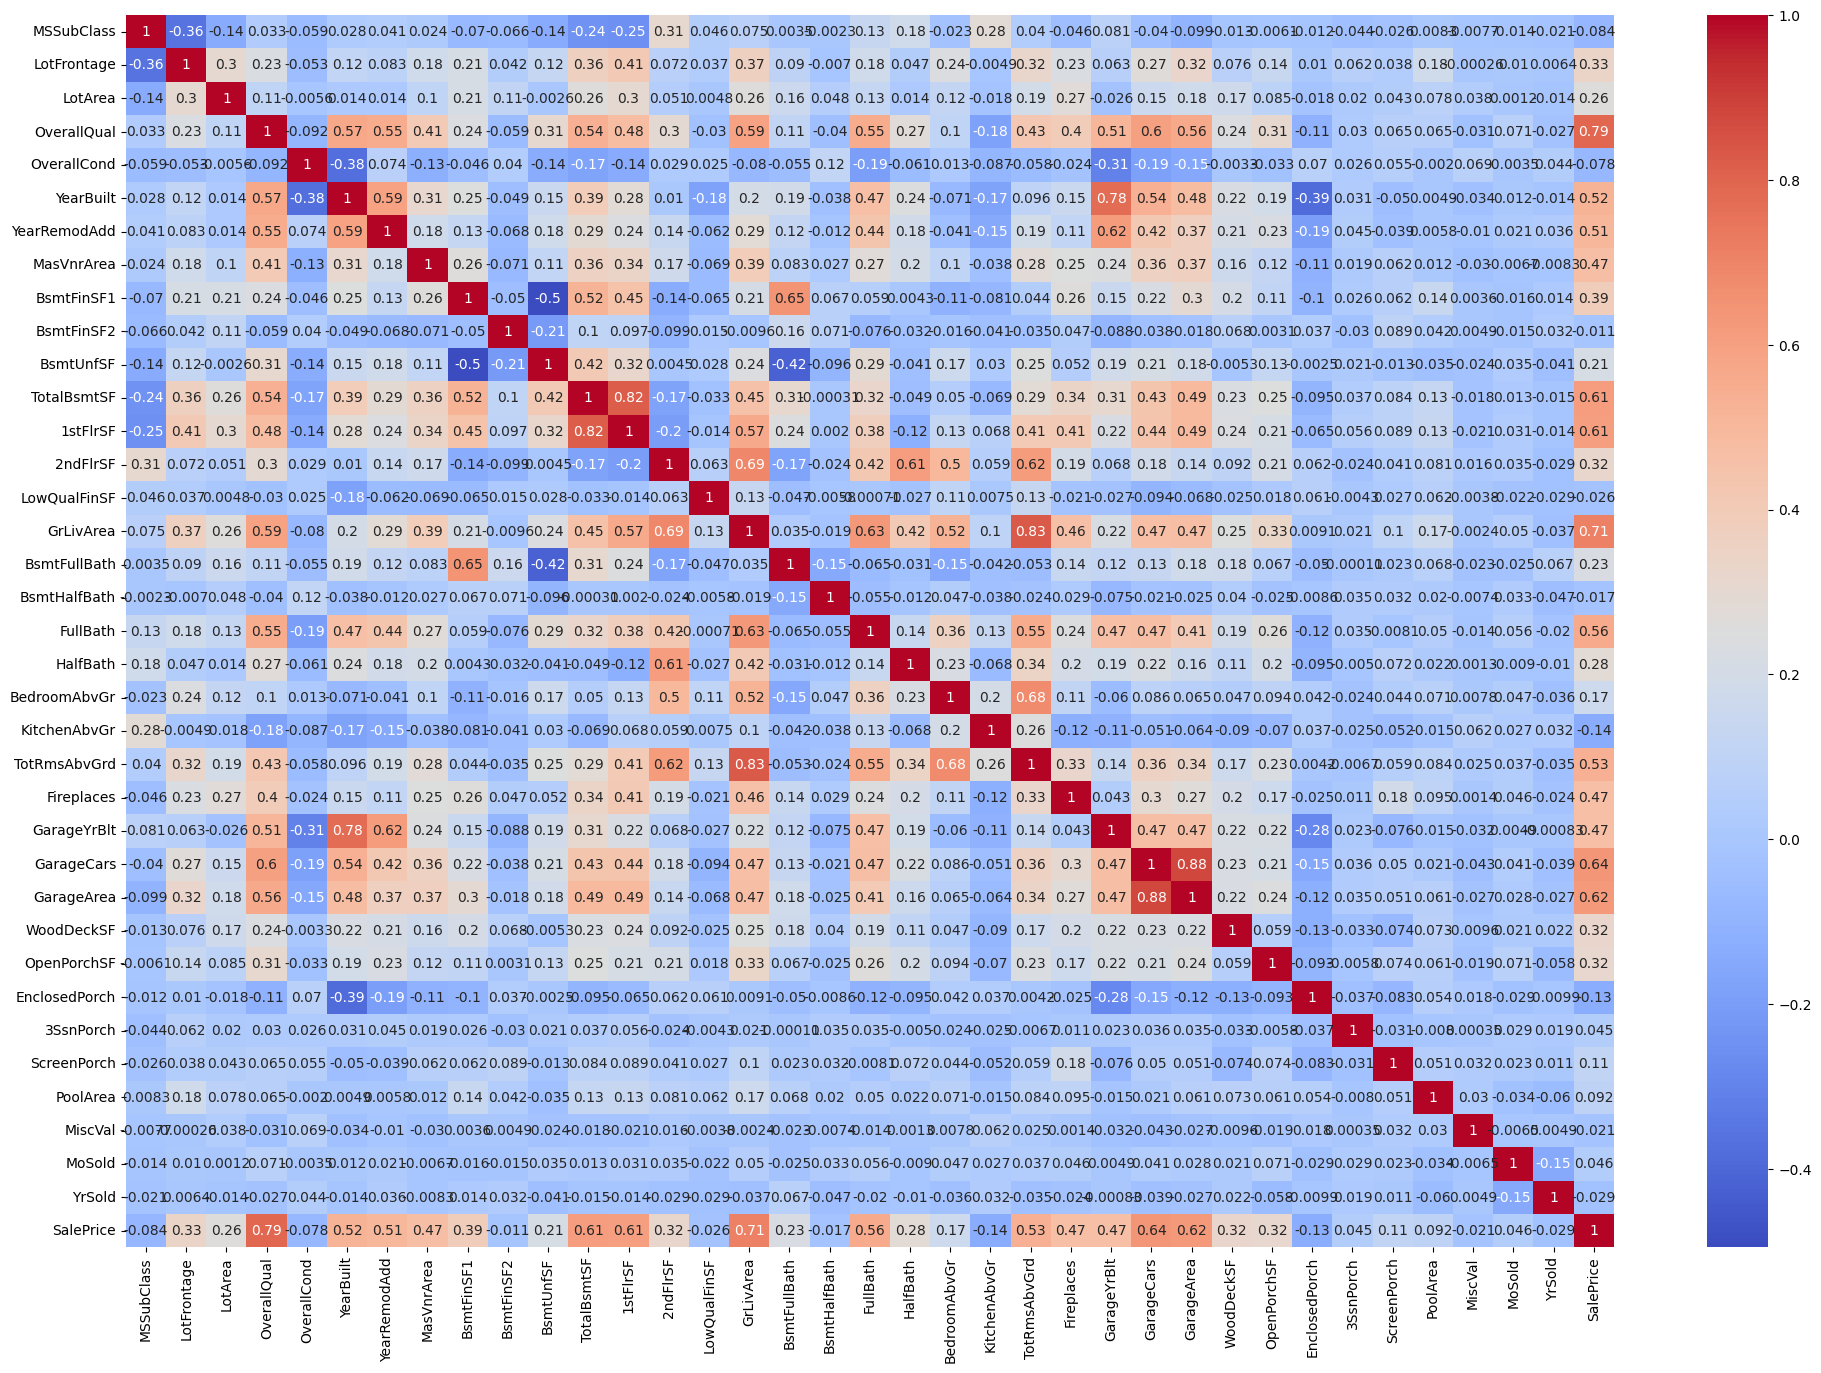

In [43]:
plt.figure(figsize=(24, 16))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap="coolwarm")
plt.show()

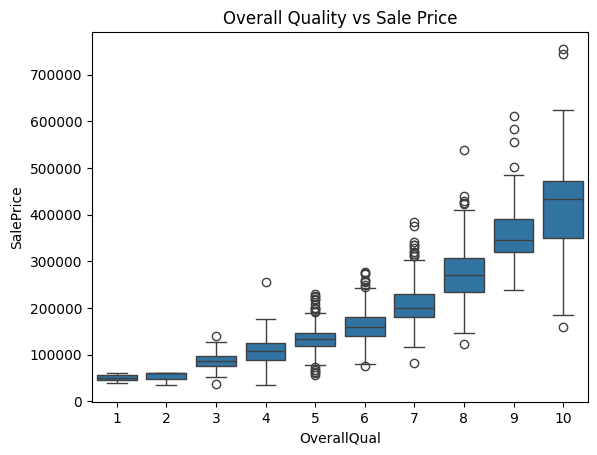

In [45]:
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("Overall Quality vs Sale Price")
plt.show()

<Figure size 2000x1200 with 0 Axes>

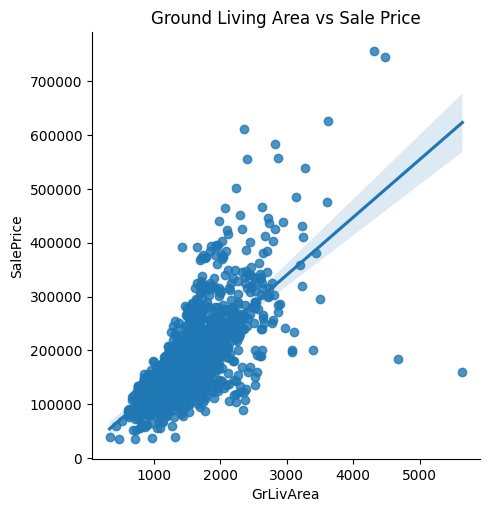

In [48]:
plt.figure(figsize=(20, 12))
sns.lmplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Ground Living Area vs Sale Price")
plt.show()

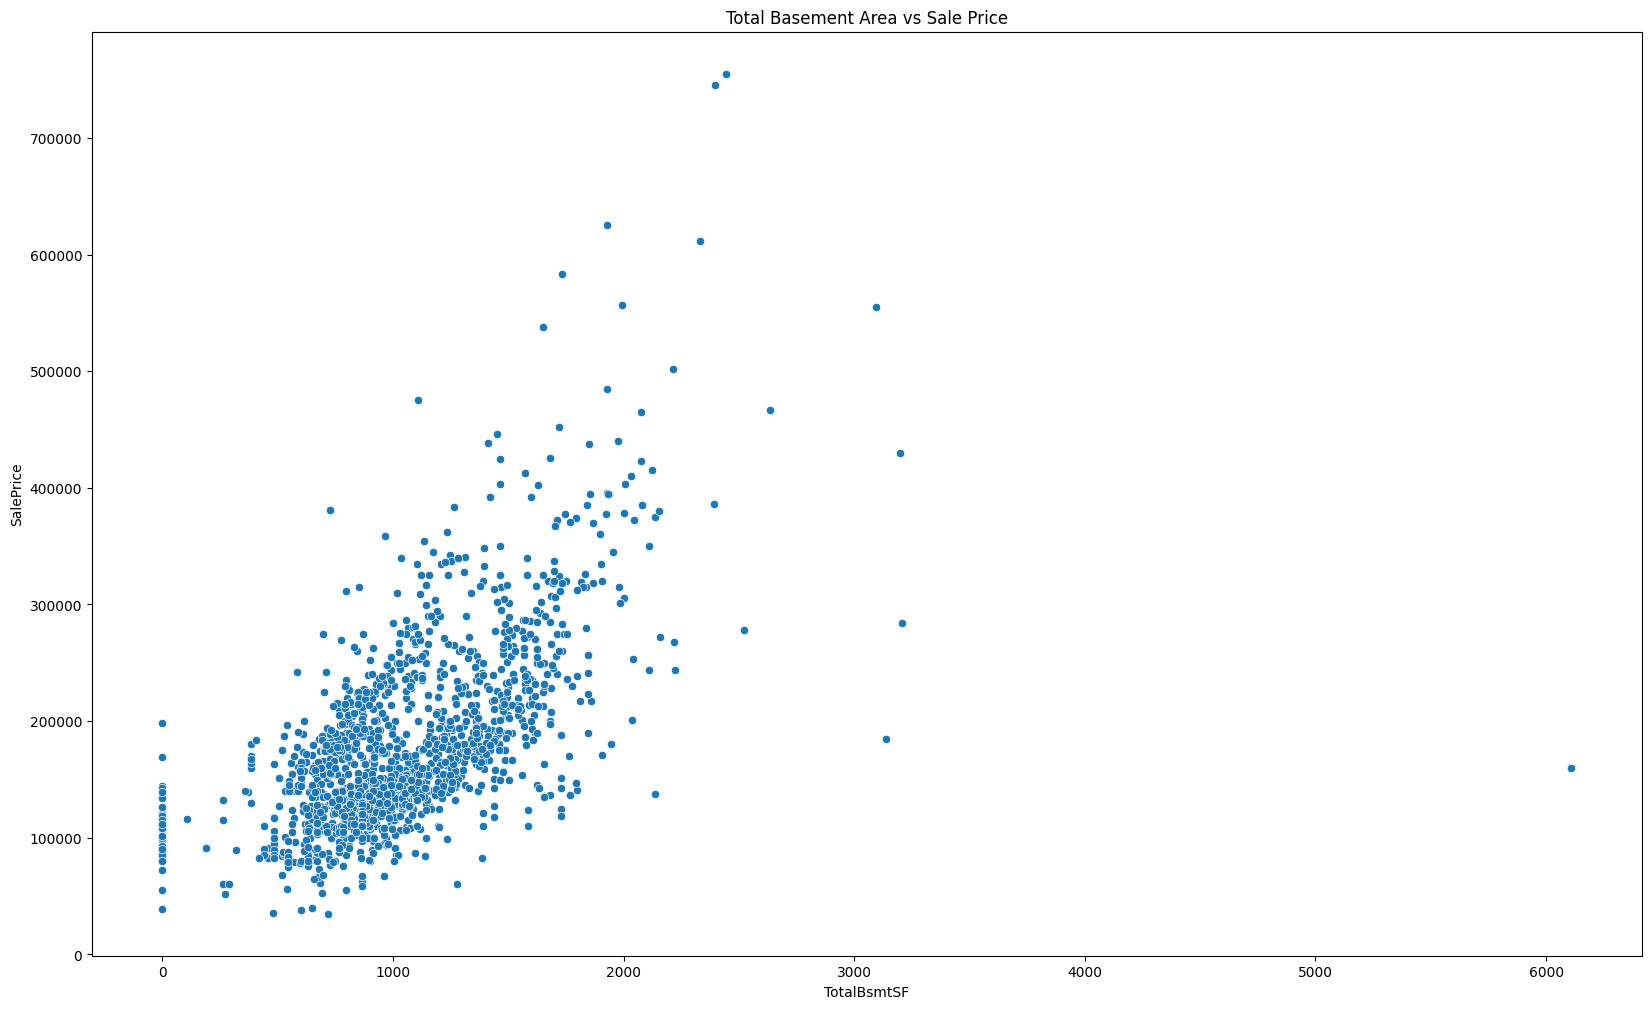

In [51]:
plt.figure(figsize=(20, 12))
sns.scatterplot(x="TotalBsmtSF", y="SalePrice", data=df)
plt.title("Total Basement Area vs Sale Price")
plt.show()

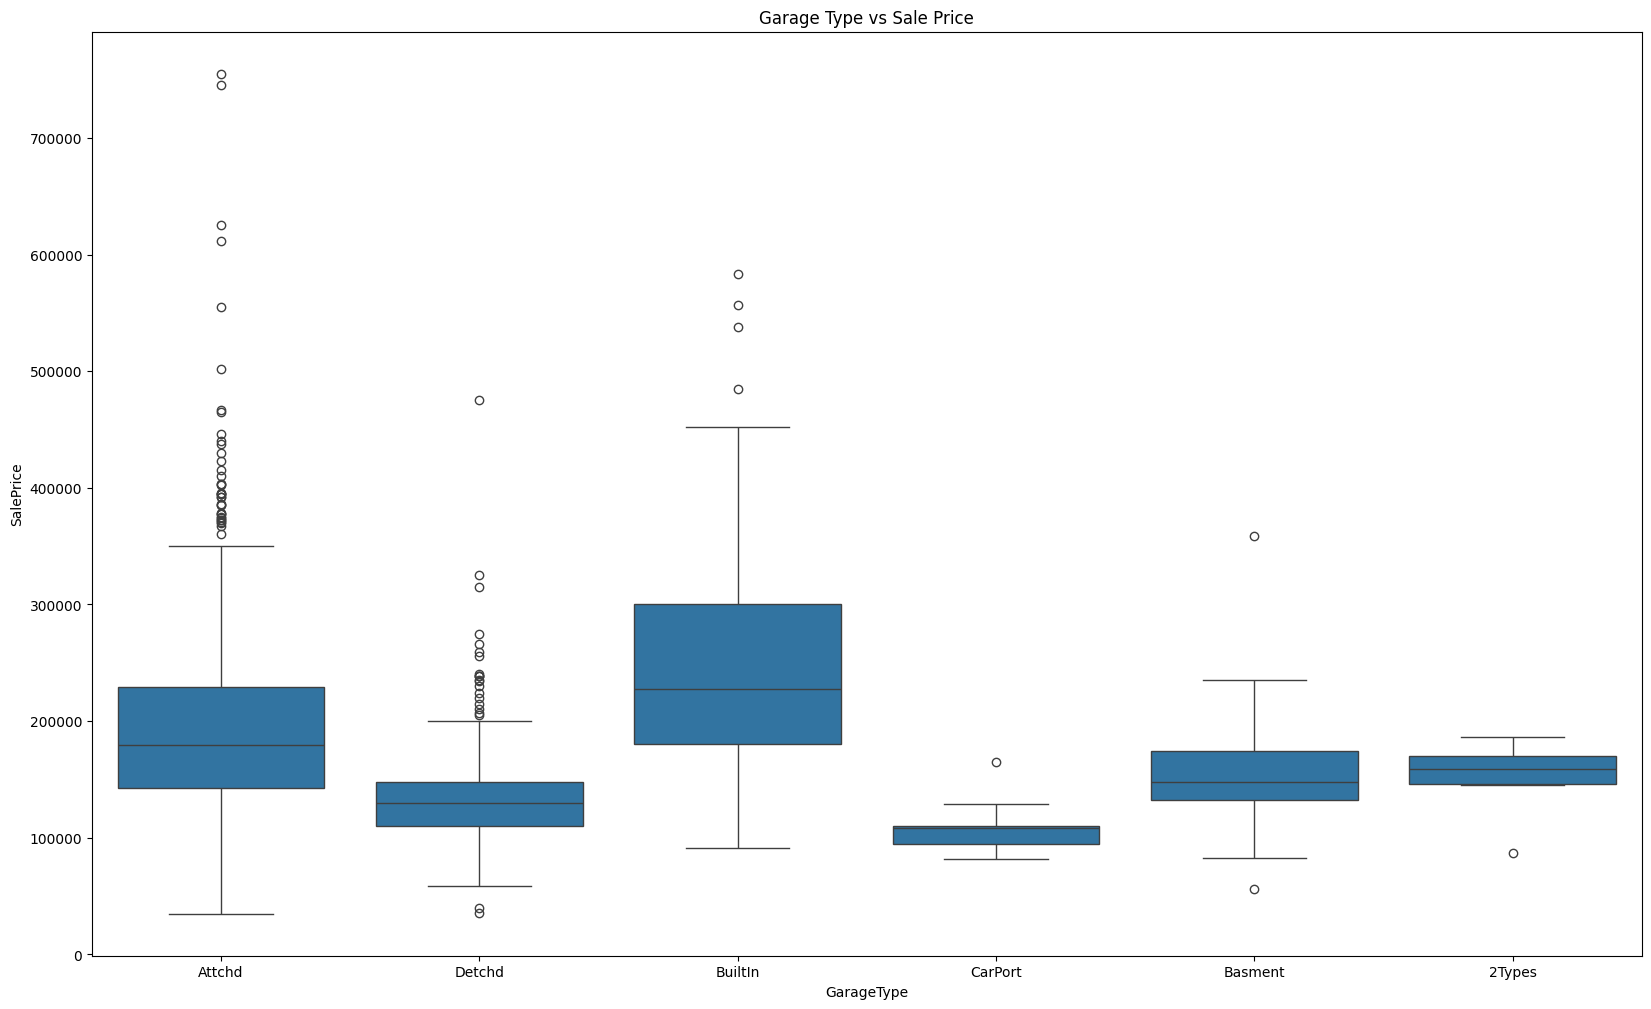

In [54]:
plt.figure(figsize=(20, 12))
sns.boxplot(x="GarageType", y="SalePrice", data=df)
plt.title("Garage Type vs Sale Price")
plt.show()

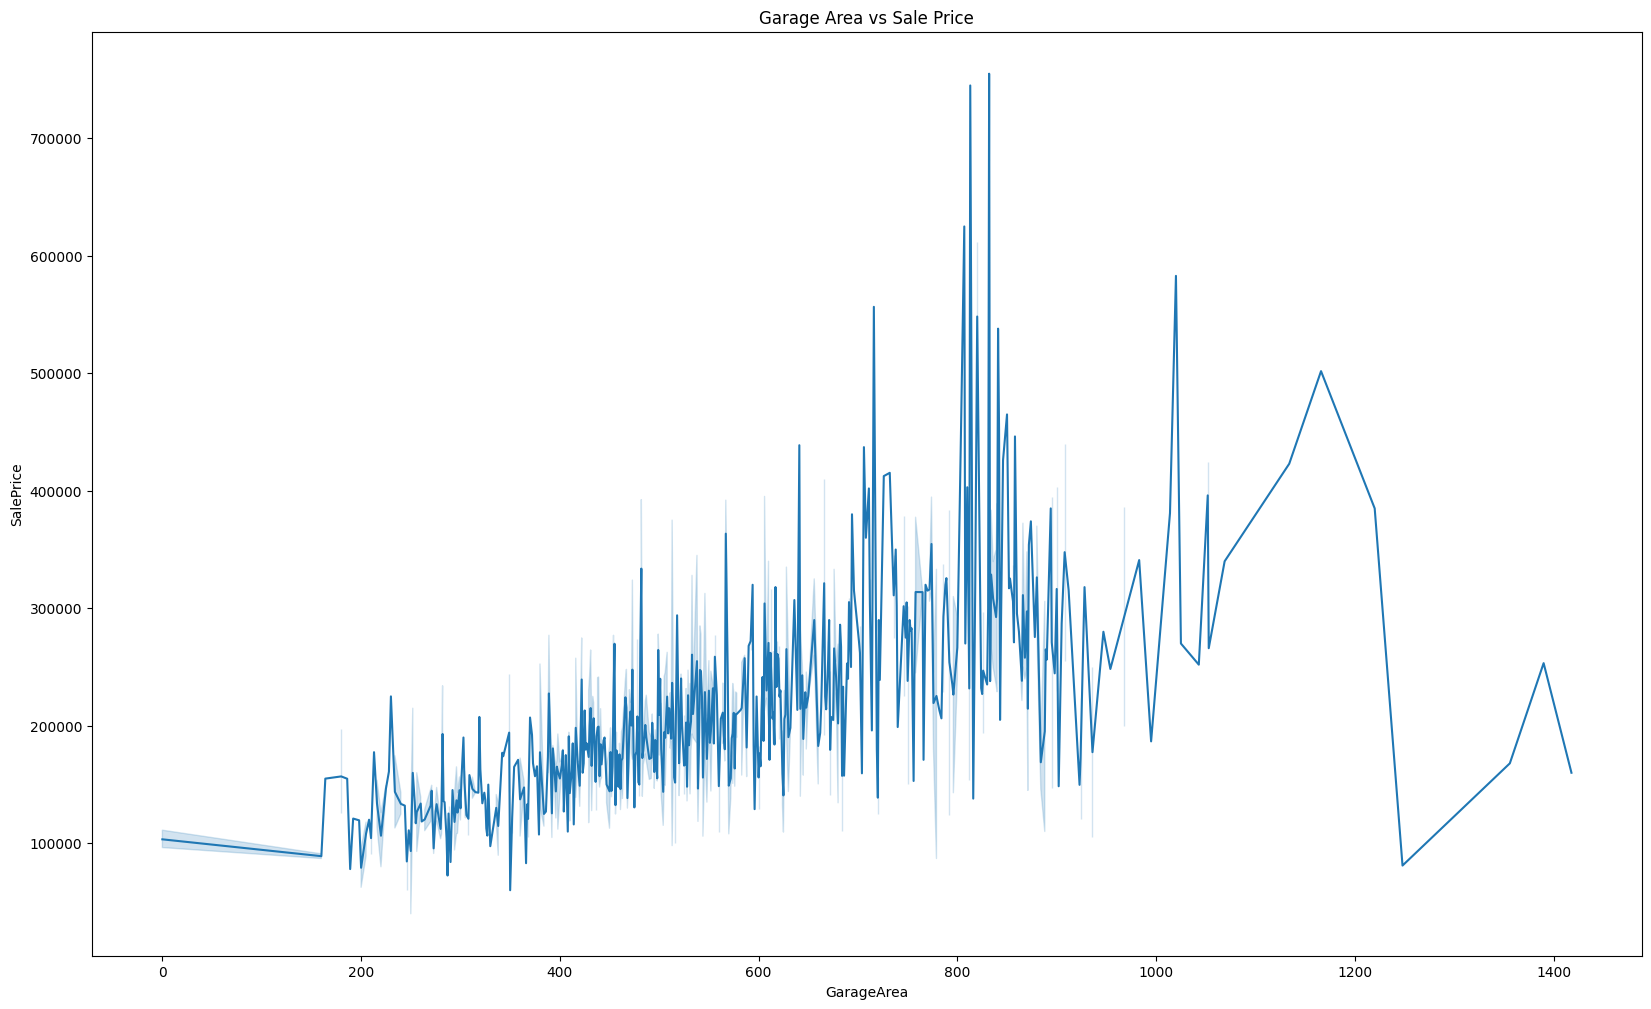

In [56]:
plt.figure(figsize=(20, 12))
sns.lineplot(x="GarageArea", y="SalePrice", data=df)
plt.title("Garage Area vs Sale Price")
plt.show()

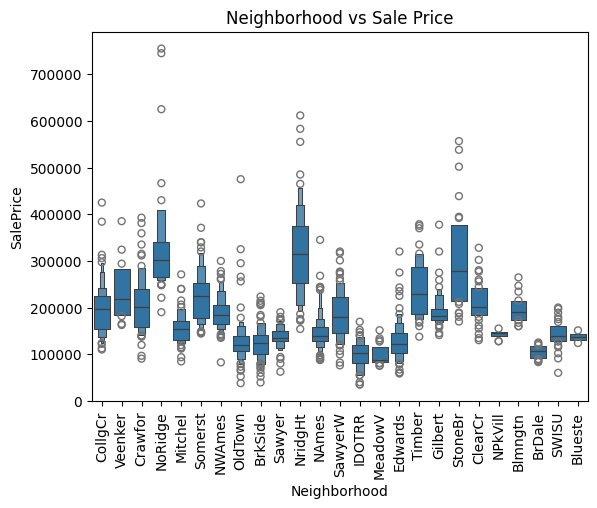

In [57]:
sns.boxenplot(x="Neighborhood", y="SalePrice", data=df)
plt.title("Neighborhood vs Sale Price")
plt.xticks(rotation=90)
plt.show()  

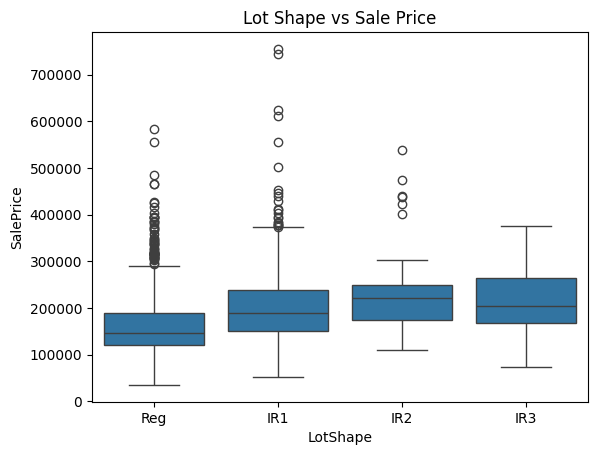

In [58]:
sns.boxplot(x = "LotShape", y = "SalePrice", data = df)
plt.title("Lot Shape vs Sale Price")
plt.show()

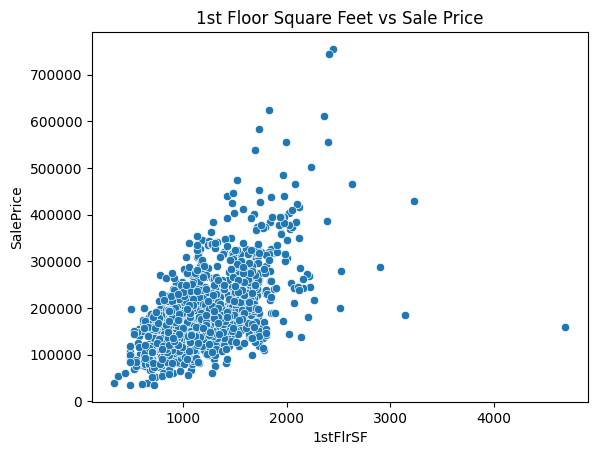

In [60]:
sns.scatterplot(x = "1stFlrSF", y = "SalePrice", data = df)
plt.title("1st Floor Square Feet vs Sale Price")
plt.show()

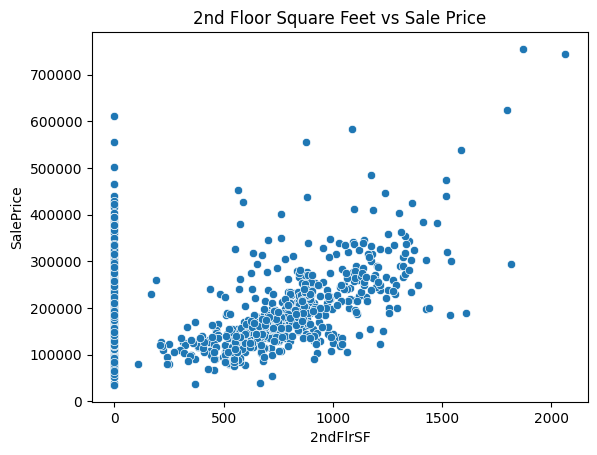

In [61]:
sns.scatterplot(x = "2ndFlrSF", y = "SalePrice", data = df)
plt.title("2nd Floor Square Feet vs Sale Price")
plt.show()

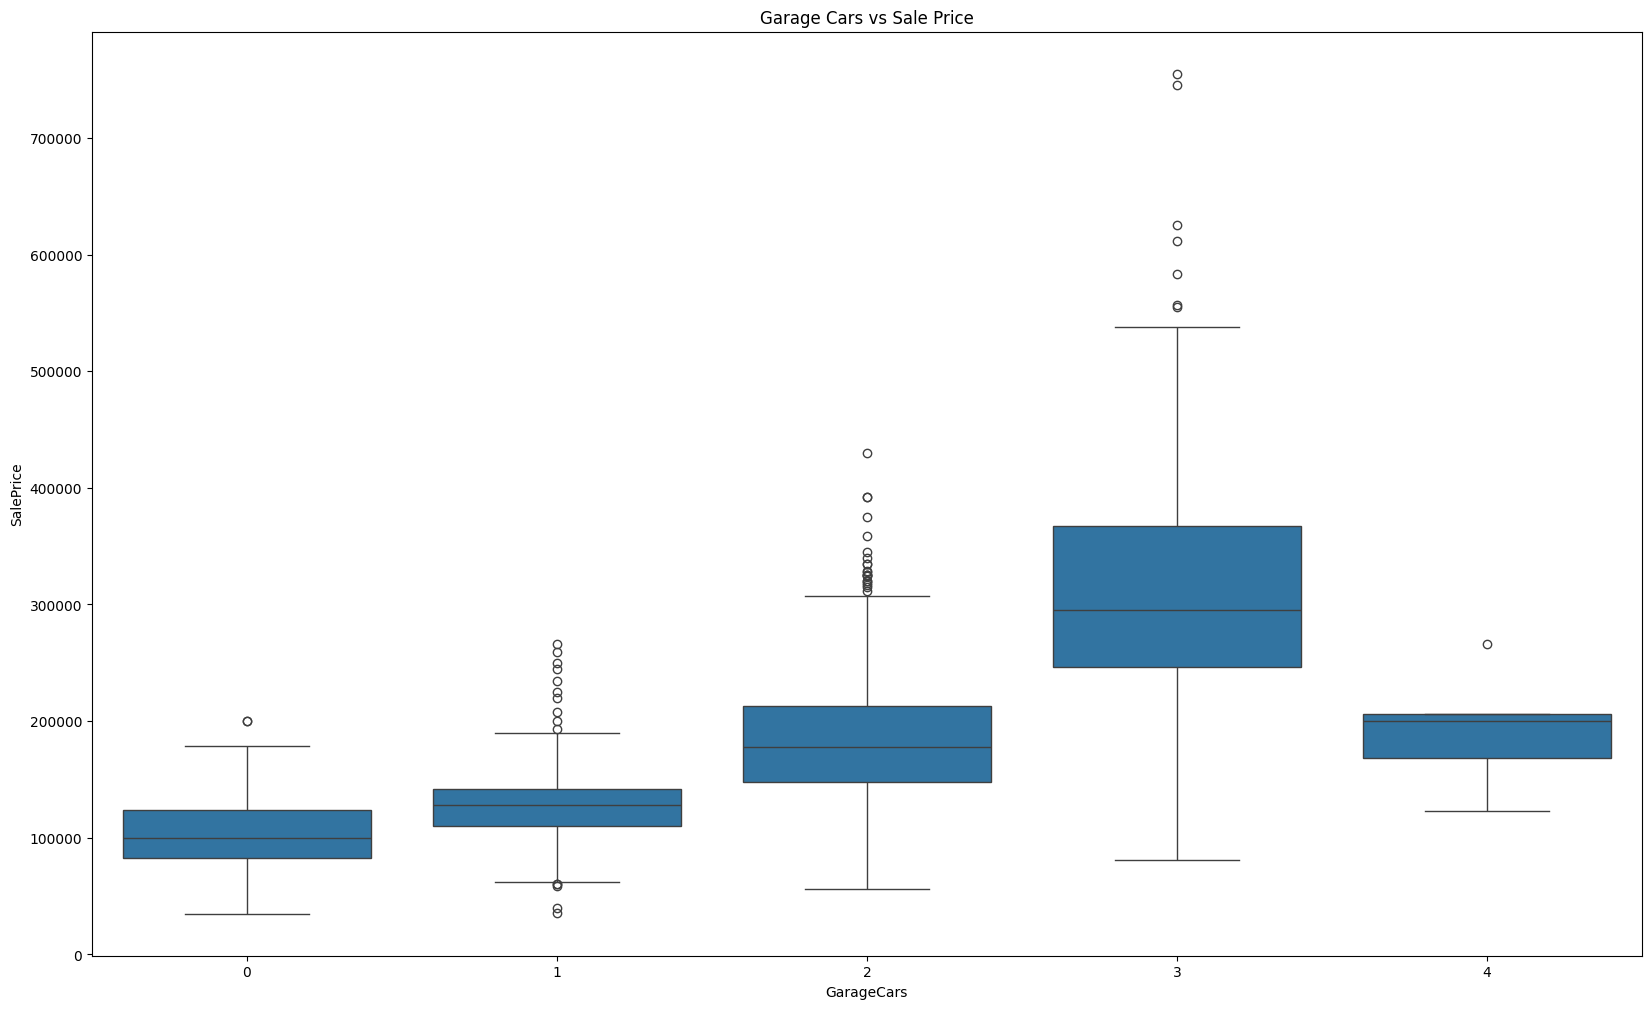

In [64]:
plt.figure(figsize=(20, 12))
sns.boxplot(x="GarageCars", y="SalePrice", data=df)
plt.title("Garage Cars vs Sale Price")
plt.show()

In [65]:
corr = df.corr(numeric_only=True)
top_features = corr["SalePrice"].abs().sort_values(ascending=False).head(8).index
top_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath'],
      dtype='str')

In [70]:
df = df[~((df["GrLivArea"] > 4000) & (df["SalePrice"] < 300000))]

X = df[top_features].drop("SalePrice", axis=1)
y = df["SalePrice"]

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [89]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 32868.84353539026
